In [117]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
import scipy
import numpy as np
from numpy import log
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series
import statsmodels
import sklearn
from sklearn import metrics
import statsmodels.tsa.ar_model as sta
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

C:\Users\JohntheGreat\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [157]:
# read csv
df = pd.read_csv('MSAGasPrices.csv', parse_dates=True)
print(df.head())

     Date Location  Price  Non Farm Payrolls, SA  Unemployment Rate,NSA  \
0  1/2/14  Chicago  3.325                 4470.9                    8.8   
1  2/1/14  Chicago  3.277                 4476.7                    8.9   
2  3/1/14  Chicago  3.459                 4483.3                    8.2   
3  4/1/14  Chicago  3.562                 4493.5                    7.0   
4  5/1/14  Chicago  3.688                 4503.2                    7.0   

   Average Hourly Earnings, SA  New Housing, SA  
0                         26.4           1181.9  
1                         26.6            939.4  
2                         26.7           1344.2  
3                         26.6           1495.9  
4                         26.7           1478.7  


In [158]:
# Select only Chicago data
df_chi = df[df.Location == 'Chicago']
# Select only Date, Price, NFP columns
df_chi = df_chi.iloc[:,[0,2,3]]
# rename columns
df_chi.columns = ['ds','y','nfp']
# slplit into train/test
df_chitrain = df_chi[:35]
df_chitest = df_chi[35:]

In [159]:
# show tail of training set
df_chitrain.tail()

,ds,y,nfp
30,7/1/16,2.285,4662.3
31,8/1/16,2.128,4664.1
32,9/1/16,2.225,4668.1
33,10/1/16,2.225,4665.3
34,11/1/16,2.209,4662.7


In [ ]:
# Show tail of test set has NAs for nfp
df_chitest.tail()

In [43]:
# remove last 2 observations, display tail
df_chitest = df_chitest[:-2]
df_chitest.tail()

,ds,y,nfp
41,6/1/17,2.392,4688.9
42,7/1/17,2.231,4683.1
43,8/1/17,2.334,4688.5
44,9/1/17,2.581,4684.5
45,10/1/17,2.536,4686.8


In [44]:
m = Prophet()
m.add_regressor('nfp')
m.fit(df_chitrain)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [56]:
# Prophet method to create future (empty data frame for forecasting)
#### creates 2016-11-30 as first future observation instead of 2016-12-01
#future = m.make_future_dataframe(periods=11, freq = "m", include_history = True)
#future.tail(15)


,ds
31,2016-08-01
32,2016-09-01
33,2016-10-01
34,2016-11-01
35,2016-11-30
36,2016-12-31
37,2017-01-31
38,2017-02-28
39,2017-03-31
40,2017-04-30


In [71]:
# Create future manually
future = pd.DataFrame(df_chi['ds'].iloc[:-2])
future['nfp'] = df_chi['nfp']
future.tail()

,ds,nfp
41,6/1/17,4688.9
42,7/1/17,4683.1
43,8/1/17,4688.5
44,9/1/17,4684.5
45,10/1/17,4686.8


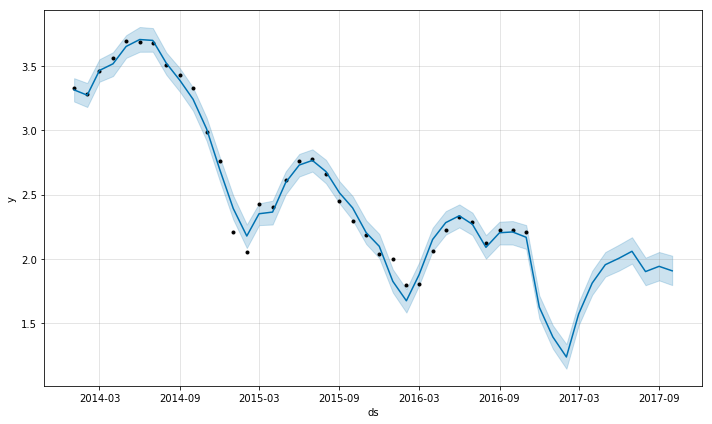

In [75]:
forecast = m.predict(future)
m.plot(forecast)


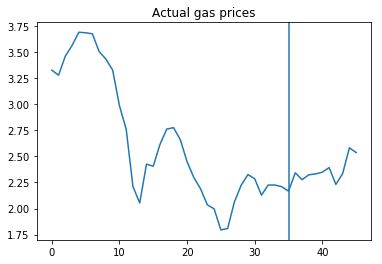

In [112]:
# plot of actuals
plt.plot(df_chi.y)
plt.axvline(x=35)
plt.title('Actual gas prices')
plt.show()

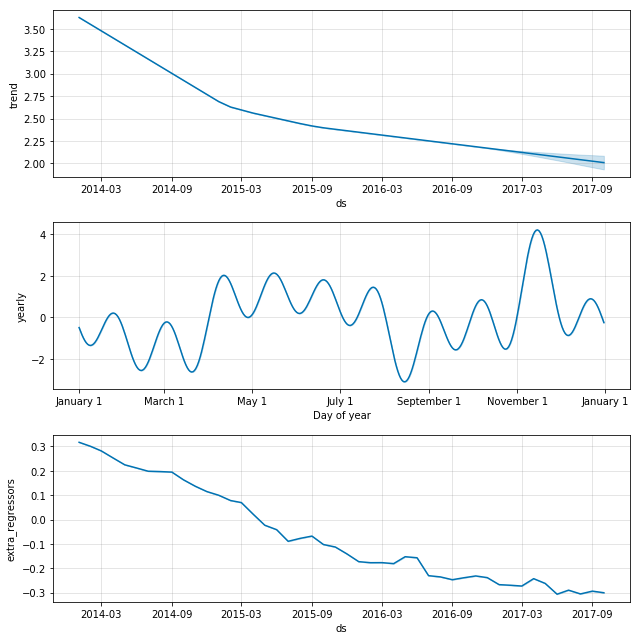

In [74]:
m.plot_components(forecast)

In [100]:
forecast.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,extra_regressors,extra_regressors_lower,extra_regressors_upper,nfp,...,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,yearly,yearly_lower,yearly_upper,yhat
0,2014-01-02,3.625543,3.625543,3.625543,3.222200,3.403295,0.316648,0.316648,0.316648,0.316648,...,-0.313143,-0.313143,-0.313143,-0.629791,-0.629791,-0.629791,-0.629791,-0.629791,-0.629791,3.312401
1,2014-02-01,3.548334,3.548334,3.548334,3.179404,3.365571,0.300074,0.300074,0.300074,0.300074,...,-0.276941,-0.276941,-0.276941,-0.577014,-0.577014,-0.577014,-0.577014,-0.577014,-0.577014,3.271393
2,2014-03-01,3.476271,3.476271,3.476271,3.375814,3.550583,0.281213,0.281213,0.281213,0.281213,...,-0.013049,-0.013049,-0.013049,-0.294262,-0.294262,-0.294262,-0.294262,-0.294262,-0.294262,3.463222
3,2014-04-01,3.396488,3.396488,3.396488,3.419452,3.604665,0.252065,0.252065,0.252065,0.252065,...,0.118366,0.118366,0.118366,-0.133698,-0.133698,-0.133698,-0.133698,-0.133698,-0.133698,3.514854
4,2014-05-01,3.319278,3.319278,3.319278,3.560677,3.736783,0.224345,0.224345,0.224345,0.224345,...,0.330239,0.330239,0.330239,0.105894,0.105894,0.105894,0.105894,0.105894,0.105894,3.649516


In [93]:
pred = forecast.yhat[35:] 
act = df_chitest.y
mse = sum((pred - act)**2)
mse

4.4132617776824645

In [98]:
results = pd.concat([pred,act], axis=1)
results

,yhat,y
35,1.626398,2.166
36,1.395193,2.342
37,1.239494,2.276
38,1.572737,2.323
39,1.813069,2.331
40,1.955738,2.348
41,2.005332,2.392
42,2.059779,2.231
43,1.902372,2.334
44,1.943029,2.581


#### Using VAR, not Prophet

In [153]:
# VAR Model
vardata = df_chitrain
vardata.head()

,ds,y,nfp
0,1/2/14,3.325,4470.9
1,2/1/14,3.277,4476.7
2,3/1/14,3.459,4483.3
3,4/1/14,3.562,4493.5
4,5/1/14,3.688,4503.2


In [119]:
# check for gas prices stationarity
result = adfuller(vardata.y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('t%s: %.3f' % (key, value))
### Cannot reject the null, not stationary

ADF Statistic: -1.460913
p-value: 0.552751
Critical Values:
t1%: -3.646
t5%: -2.954
t10%: -2.616


In [120]:
# check nfp for stationarity
result = adfuller(vardata.nfp)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('t%s: %.3f' % (key, value))
### Cannot reject the null, not stationary

ADF Statistic: -1.360770
p-value: 0.600932
Critical Values:
t1%: -3.738
t5%: -2.992
t10%: -2.636


In [137]:
# differencing the dataframe
vardatadiff = vardata.iloc[:,1:3].diff(1, axis = 0)

In [142]:
vardatadiff['ds'] = vardata['ds']
vardatadiff = vardatadiff.iloc[1:]

In [146]:
cols = vardatadiff.columns.tolist()
cols = cols[-1:] + cols[:-1]
vardatadiff = vardatadiff[cols]
vardatadiff.head()

,ds,y,nfp
1,2/1/14,-0.048,5.8
2,3/1/14,0.182,6.6
3,4/1/14,0.103,10.2
4,5/1/14,0.126,9.7
5,6/1/14,-0.005,4.6


In [148]:
# Now with the differenced data, check for stationarity
# check gas prices time series
result = adfuller(vardatadiff.y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('t%s: %.3f' % (key, value))

ADF Statistic: -3.583016
p-value: 0.006094
Critical Values:
t1%: -3.646
t5%: -2.954
t10%: -2.616


In [149]:
# check nfp for stationarity
result = adfuller(vardatadiff.nfp)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('t%s: %.3f' % (key, value))

ADF Statistic: -2.113665
p-value: 0.239055
Critical Values:
t1%: -3.738
t5%: -2.992
t10%: -2.636


In [165]:
df_chitrain['ds'] = pd.to_datetime(df_chitrain['ds'])

In [167]:
varmodel = VAR(df_chitrain)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [166]:
np.asarray(df_chitrain)

array([[Timestamp('2014-01-02 00:00:00'), 3.325, 4470.9],
       [Timestamp('2014-02-01 00:00:00'), 3.2769999999999997, 4476.7],
       [Timestamp('2014-03-01 00:00:00'), 3.4589999999999996, 4483.3],
       [Timestamp('2014-04-01 00:00:00'), 3.562, 4493.5],
       [Timestamp('2014-05-01 00:00:00'), 3.688, 4503.2],
       [Timestamp('2014-06-01 00:00:00'), 3.6830000000000003, 4507.8],
       [Timestamp('2014-07-01 00:00:00'), 3.673, 4512.4],
       [Timestamp('2014-08-01 00:00:00'), 3.503, 4512.9],
       [Timestamp('2014-09-01 00:00:00'), 3.431, 4513.7],
       [Timestamp('2014-10-01 00:00:00'), 3.325, 4524.7],
       [Timestamp('2014-11-01 00:00:00'), 2.985, 4534.0],
       [Timestamp('2014-12-01 00:00:00'), 2.759, 4541.6],
       [Timestamp('2015-01-01 00:00:00'), 2.21, 4546.9],
       [Timestamp('2015-02-01 00:00:00'), 2.053, 4554.5],
       [Timestamp('2015-03-01 00:00:00'), 2.425, 4557.4],
       [Timestamp('2015-04-01 00:00:00'), 2.405, 4574.2],
       [Timestamp('2015-05-01 00:0